# Regresion lineal
creado por Marco Jurado 20308


### >> Abrir el csv

In [916]:
import csv
with open('kc_house_data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    datacsv = []
    for row in csv_reader:
        datacsv.append(row)

In [917]:
print(' Elementos en el dataset \n',datacsv[0:1])
print('\n\n Primeros cinco elementos del dataset \n',datacsv[1:5])
print('\n\n Ulitmos cinco elementos del dataset \n',datacsv[-5:])
print('\n\n Data tiene un size the ',len(datacsv))

 Elementos en el dataset 
 [['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]


 Primeros cinco elementos del dataset 
 [['7129300520', '20141013T000000', '221900', '3', '1', '1180', '5650', '1', '0', '0', '3', '7', '1180', '0', '1955', '0', '98178', '47.5112', '-122.257', '1340', '5650'], ['6414100192', '20141209T000000', '538000', '3', '2.25', '2570', '7242', '2', '0', '0', '3', '7', '2170', '400', '1951', '1991', '98125', '47.721', '-122.319', '1690', '7639'], ['5631500400', '20150225T000000', '180000', '2', '1', '770', '10000', '1', '0', '0', '3', '6', '770', '0', '1933', '0', '98028', '47.7379', '-122.233', '2720', '8062'], ['2487200875', '20141209T000000', '604000', '4', '3', '1960', '5000', '1', '0', '0', '5', '7', '1050', '910', '1965', '0', '98136', '47.5208', '-122.393', '1360', '50

crear arreglo de numpy con instruccion de genfromtxt

In [918]:
import numpy as np

data = np.array(np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True))
data

array([[         nan,          nan,  2.21900e+05, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [         nan,          nan,  5.38000e+05, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [         nan,          nan,  1.80000e+05, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [         nan,          nan,  4.02101e+05, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [         nan,          nan,  4.00000e+05, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [         nan,          nan,  3.25000e+05, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

Ahora limpio las dos variables de price y sqft living

In [919]:
data = data[~np.isnan(data[:,2])] # price
data = data[~np.isnan(data[:,5])] # sqft living
data.shape


(21613, 21)

Funciones que serán utiles tanto para regresió lineal como para gradiente. 

In [920]:
norm = lambda v: (sum(v**2))**0.5
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

Function de Regresion Lineal <br>
Segun fue visto en clase

In [921]:
def regLineal(X, y, t, cost, grad, a=0.1, n=1000, on_step=None): 
    costs = []
    for i in range(n):
        t -= a * grad(X, y, t)
        costs.append(cost(X, y, t))
        if on_step:
            on_step(t)
    
    return t, costs

Function de Gradiente vista en clase

In [922]:
def gradient_descent(theta, X, y, funcionCostos, costoGradiente, learning_rate=0.01, threshold=0.001, max_iter=10000, poli=1):
    X = X ** poli
    tempTheta = theta
    i = 0
    costs, norms = [], []
    while np.linalg.norm(costoGradiente(tempTheta, X, y, 0.1)) > threshold and i < max_iter:
        tempTheta -= learning_rate * costoGradiente(tempTheta, X, y, 0.1)
        i += 1
        costs.append(funcionCostos(tempTheta, X, y, 0.1))
        norms.append(tempTheta.copy())

    return tempTheta, costs, norms

Function de costo linear

In [923]:
def costoLinear(theta, X, y, lmbd):
    return (( (X @ theta) - y) ** 2).sum() / (2 * len(X)) + ((lmbd / (2 * len(X))) * (theta[1:] ** 2).sum())


Function de costo gradiente

In [924]:
def costoGradiente(theta, X, y, lmbd):
    h = X @ theta + 0
    theta_copy = theta.copy()
    theta_copy[0] = 0
    return ((X.T @ (h - y)) / len(X))

### >> Task 1.2 - Modelo de regresión lineal

Primero separamos X y Y. Siendo estas:
- price
- sqft living

In [925]:
X = data[:, 5].reshape(-1, 1)
Y = data[:, 2].reshape(-1, 1)

ahora hay que calcular el Xr

In [926]:
Xr = np.column_stack((np.ones_like(X), X))

ahora el primer valor que tomara el theta

In [927]:
theta_0 = np.random.rand(Xr.shape[1],1)
theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

Ahora se calcula la regresion lineal

In [928]:
thetaf, cost = regLineal(Xr, Y, theta_0, cost, grad, a=0.00000001, n=75)

Ahora tenemos que calcular el valor de Xm y Xmr

In [929]:
xm = np.array([[0], [len(X)]])
xmr = np.concatenate((np.ones((2, 1)), xm), axis=1)
xmr

array([[1.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.1613e+04]])

In [930]:
ym = xmr @ thetaf

Finalmente demostramos los resultados graficamente

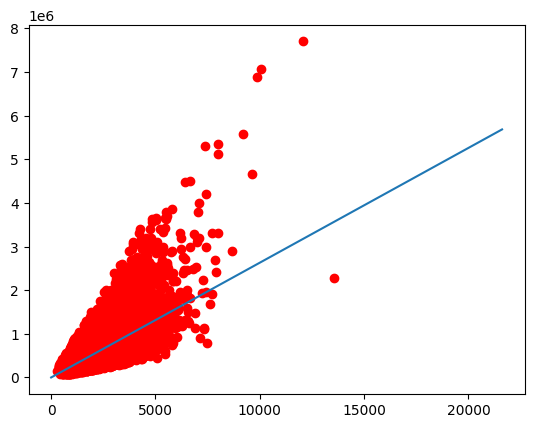

In [931]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro') #puntos
plt.plot(xm,ym) #regresion
plt.show()

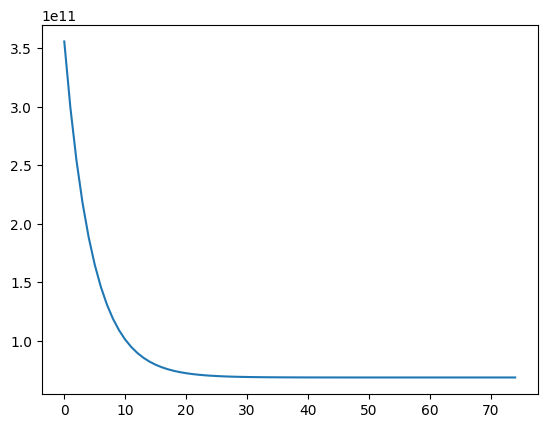

In [932]:
plt.plot(cost) #costo
plt.show()

### >> Task 1.3 - Modelo con decenso de gradiente
repetimos el modelo pero utilizando la función de decenso de gradiente vista en clase

In [933]:
import numpy as np
data = np.array(np.genfromtxt('kc_house_data.csv', delimiter=',', skip_header=True))
data

array([[         nan,          nan,  2.21900e+05, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [         nan,          nan,  5.38000e+05, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [         nan,          nan,  1.80000e+05, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [         nan,          nan,  4.02101e+05, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [         nan,          nan,  4.00000e+05, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [         nan,          nan,  3.25000e+05, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [934]:
X = data[:, 5].reshape(-1, 1)
Y = data[:, 2].reshape(-1, 1)
m, n = X.shape

In [935]:
Xr = np.column_stack((np.ones_like(X), X))

In [936]:
m

21613

In [937]:
n

1

ahora primer valor de theta

In [938]:
theta_0 = np.random.rand(Xr.shape[1],1)
theta_0 = theta_0[~np.isnan(theta_0)].reshape((-1, 1))

Ahora se calcula con el gradient descent

In [939]:
print(theta_0.shape)
print(Xr.shape)
print(Y.shape)

(2, 1)
(21613, 2)
(21613, 1)


In [940]:
r_theta, costs, thetas = gradient_descent(theta_0, Xr, Y, costoLinear, costoGradiente, learning_rate=0.00000001, threshold=0.001, max_iter=500, poli=1)

In [941]:
r_theta

array([[  0.8092729 ],
       [263.08886328]])

In [942]:
costs

[194916944523.00912,
 178743134820.95532,
 164198306225.95468,
 151118392293.79266,
 139355850895.97614,
 128777999936.63545,
 119265520691.38872,
 110711111885.75134,
 103018279331.02269,
 96100247464.6783,
 89878980517.3849,
 84284302265.35014,
 79253104438.76596,
 74728634857.15099,
 70659857261.72041,
 67000875623.65805,
 63710416434.45735,
 60751363138.538765,
 58090337456.518295,
 55697322876.43125,
 53545326065.87258,
 51610072385.764046,
 49869732071.1274,
 48304673990.16843,
 46897244204.0606,
 45631566829.57122,
 44493364958.24974,
 43469799612.137054,
 42549324919.40771,
 41721557876.318375,
 40977161226.37044,
 40307738135.55749,
 39705737475.62881,
 39164368646.958855,
 38677524980.220604,
 38239714852.82881,
 37845999743.143776,
 37491938523.6832,
 37173537364.96661,
 36887204684.905464,
 36629710635.56497,
 36398150670.30683,
 36189912780.3478,
 36002648031.160965,
 35834244066.36871,
 35682801280.24982,
 35546611390.08536,
 35424138166.63829,
 35314000105.40556,
 352149

In [943]:
thetas

[array([[ 0.74447112],
        [13.83268597]]),
 array([[ 0.74958428],
        [26.71792951]]),
 array([[ 0.75442945],
        [38.93707317]]),
 array([[ 0.75902047],
        [50.52455084]]),
 array([[ 0.76337049],
        [61.51301636]]),
 array([[ 0.76749195],
        [71.93343553]]),
 array([[ 0.77139668],
        [81.81517338]]),
 array([[ 0.77509588],
        [91.18607693]]),
 array([[  0.77860018],
        [100.07255364]]),
 array([[  0.78191964],
        [108.49964586]]),
 array([[  0.78506383],
        [116.49110137]]),
 array([[  0.78804181],
        [124.06944032]]),
 array([[  0.79086216],
        [131.25601867]]),
 array([[  0.79353304],
        [138.07108841]]),
 array([[  0.79606217],
        [144.53385459]]),
 array([[  0.79845689],
        [150.66252947]]),
 array([[  0.80072413],
        [156.47438382]]),
 array([[  0.80287049],
        [161.98579563]]),
 array([[  0.80490223],
        [167.21229619]]),
 array([[  0.80682525],
        [172.16861394]]),
 array([[  0.808

Y los valores de xm, xmr y ym

In [944]:
xm = np.array([[0], [len(X)]])
xmr = np.concatenate((np.ones((2, 1)), xm), axis=1)
xmr

array([[1.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.1613e+04]])

In [945]:
xm

array([[    0],
       [21613]])

In [946]:
ym = xmr @ r_theta
ym

array([[8.09272900e-01],
       [5.68614041e+06]])

Ahora podemos mostrar los resultados obtenidos con matplotlib

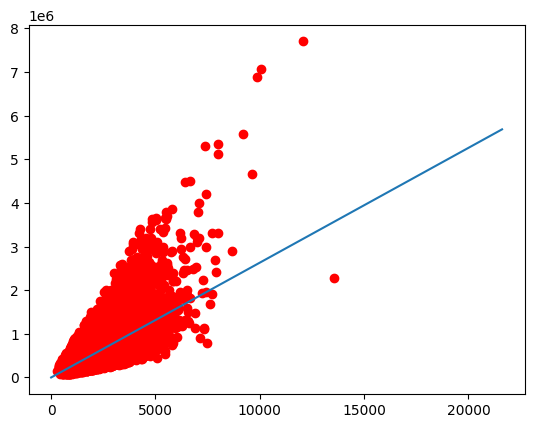

In [947]:
plt.plot(X, Y, 'ro') #puntos
plt.plot(xm,ym) #regresion
plt.show()

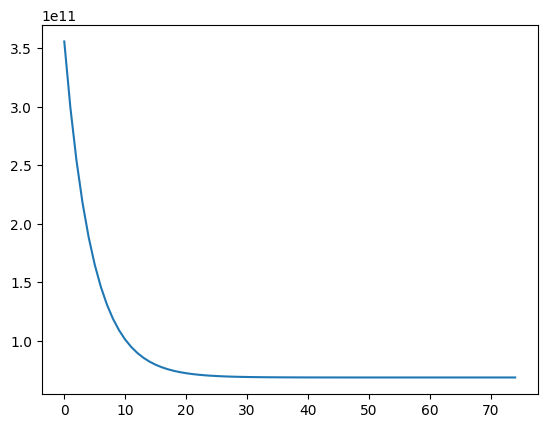

In [948]:
plt.plot(cost) #costo
plt.show()

### >> Task 1.4 - Cross Validation

Para poder comenzar primero definimos en cuantas partes queremos partir el dataset para el cross validation. En este caso vamos a usar 3 siendo estos:
- entrenamiento
- test
- validación

In [949]:
X = data[:, 5].reshape(-1, 1)
Y = data[:, 2].reshape(-1, 1)

In [950]:
type(X)

numpy.ndarray

Ahora se hace un shuffle de los arrays para poder partir estos en las correspondientes partes del cross validation

In [951]:
import random
combinadoZIP = list(zip(X, Y))
random.shuffle(combinadoZIP)

shuffleX, shuffleY = zip(*combinadoZIP)
shuffleX, shuffleY = np.array(shuffleX), np.array(shuffleY)

In [952]:
sizeA = shuffleY.size

Ya que ambos fueron mezclados manteniendo el orden de las filas del dataset con la función de zip. Dividiremos en 3.

In [953]:
shuffleX = np.arange(sizeA) # replace with your own array
shuffleY = np.arange(sizeA) # replace with your own array
combinadosShuffle = np.column_stack((shuffleX, shuffleY))

particiones = [int(len(combinadosShuffle)*0.4), int(len(combinadosShuffle)*0.8)]

entreno, test, validation = np.split(combinadosShuffle, particiones)

entreno_X, entreno_Y = entreno[:,0], entreno[:,1]
test_X, test_Y = test[:,0], test[:,1]
validation_X, validation_Y = validation[:,0], validation[:,1]

entreno_X = entreno[:,0][:,np.newaxis]
entreno_Y = entreno[:,1][:,np.newaxis]
test_X = test[:,0][:,np.newaxis]
test_Y = test[:,1][:,np.newaxis]
validation_X = validation[:,0][:,np.newaxis]
validation_Y = validation[:,1][:,np.newaxis]


print(len(entreno_X))
print(len(test_X))
print(len(validation_X))



8645
8645
4323


In [954]:
Xr_entreno = np.column_stack((np.ones_like(entreno_X), entreno_X))

In [955]:
theta_0_entreno = np.random.rand(Xr_entreno.shape[1],1)
theta_0_entreno = theta_0_entreno[~np.isnan(theta_0_entreno)].reshape((-1, 1))

Ahora una función para poder iterar y tener los valores con todos los polinomios que en este caso evaluaremos de 1 a 5

In [956]:
arrayTheta_entreno, arrayCosts_entreno, arrayThetas_entreno = [],[],[]
tempAlfa = 0.00000001
for i in range(1,6):
    polinomio = i
    tempAlfa = tempAlfa / 1000000000000000
    # ahora evaluamos en el conjunto de test
    a,b,c = gradient_descent(theta_0_entreno, Xr_entreno, entreno_Y, costoLinear, costoGradiente, learning_rate=tempAlfa, threshold=0.001, max_iter=500, poli=polinomio)
    arrayTheta_entreno.append(a)
    arrayCosts_entreno.append(b)
    arrayThetas_entreno.append(c)

ahora que tenemos los valores de theta, costos y thetas correspondientes podemos evaluarlos con la partición de test

In [957]:
print(arrayTheta_entreno)
print(arrayCosts_entreno)
print(arrayThetas_entreno)

[array([[0.9493216 ],
       [0.67097341]]), array([[0.9493216 ],
       [0.67097341]]), array([[0.9493216 ],
       [0.67097341]]), array([[0.9493216 ],
       [0.67097341]]), array([[0.9493216 ],
       [0.67097341]])]
[[1346884.8210557632, 1346884.8210557618, 1346884.8210557608, 1346884.82105576, 1346884.8210557592, 1346884.8210557583, 1346884.8210557573, 1346884.8210557564, 1346884.8210557555, 1346884.8210557548, 1346884.8210557534, 1346884.821055753, 1346884.8210557515, 1346884.8210557508, 1346884.82105575, 1346884.821055749, 1346884.8210557485, 1346884.821055747, 1346884.8210557464, 1346884.8210557457, 1346884.8210557445, 1346884.8210557436, 1346884.8210557427, 1346884.8210557417, 1346884.8210557408, 1346884.8210557401, 1346884.821055739, 1346884.8210557383, 1346884.8210557376, 1346884.8210557364, 1346884.8210557355, 1346884.8210557345, 1346884.8210557338, 1346884.8210557327, 1346884.821055732, 1346884.8210557308, 1346884.8210557299, 1346884.8210557292, 1346884.8210557282, 134688

In [958]:
Xr_test = np.column_stack((np.ones_like(test_X), test_X))
arrayTheta_test, arrayCosts_test, arrayThetas_test = [],[],[]
tempAlfa = 0.00000001
for i in range(1,6):
    polinomio = i
    tempAlfa = tempAlfa / 1000000000000000
    # ahora evaluamos en el conjunto de test
    a,b,c = gradient_descent(arrayTheta_entreno[i-1], Xr_test, test_Y, costoLinear, costoGradiente, learning_rate=tempAlfa, threshold=0.001, max_iter=500, poli=polinomio)
    arrayTheta_test.append(a)
    arrayCosts_test.append(b)
    arrayThetas_test.append(c)


In [959]:
xm_entreno = np.array([[0], [len(entreno_X)]])
xmr_entreno = np.concatenate((np.ones((2, 1)), xm_entreno), axis=1)

xm_test = np.array([[0], [len(test_X)]])
xmr_test = np.concatenate((np.ones((2, 1)), xm_test), axis=1)



In [960]:
arrayYM_entreno, arrayYM_test = [],[]


for i in arrayTheta_entreno:
    arrayYM_entreno.append(xmr_entreno @ i)

for i in arrayTheta_test:
    arrayYM_test.append(xmr_test @ i)

Ya que tenemos ambos datos con el modelo evaluado en test y entreno podemos graficarlo

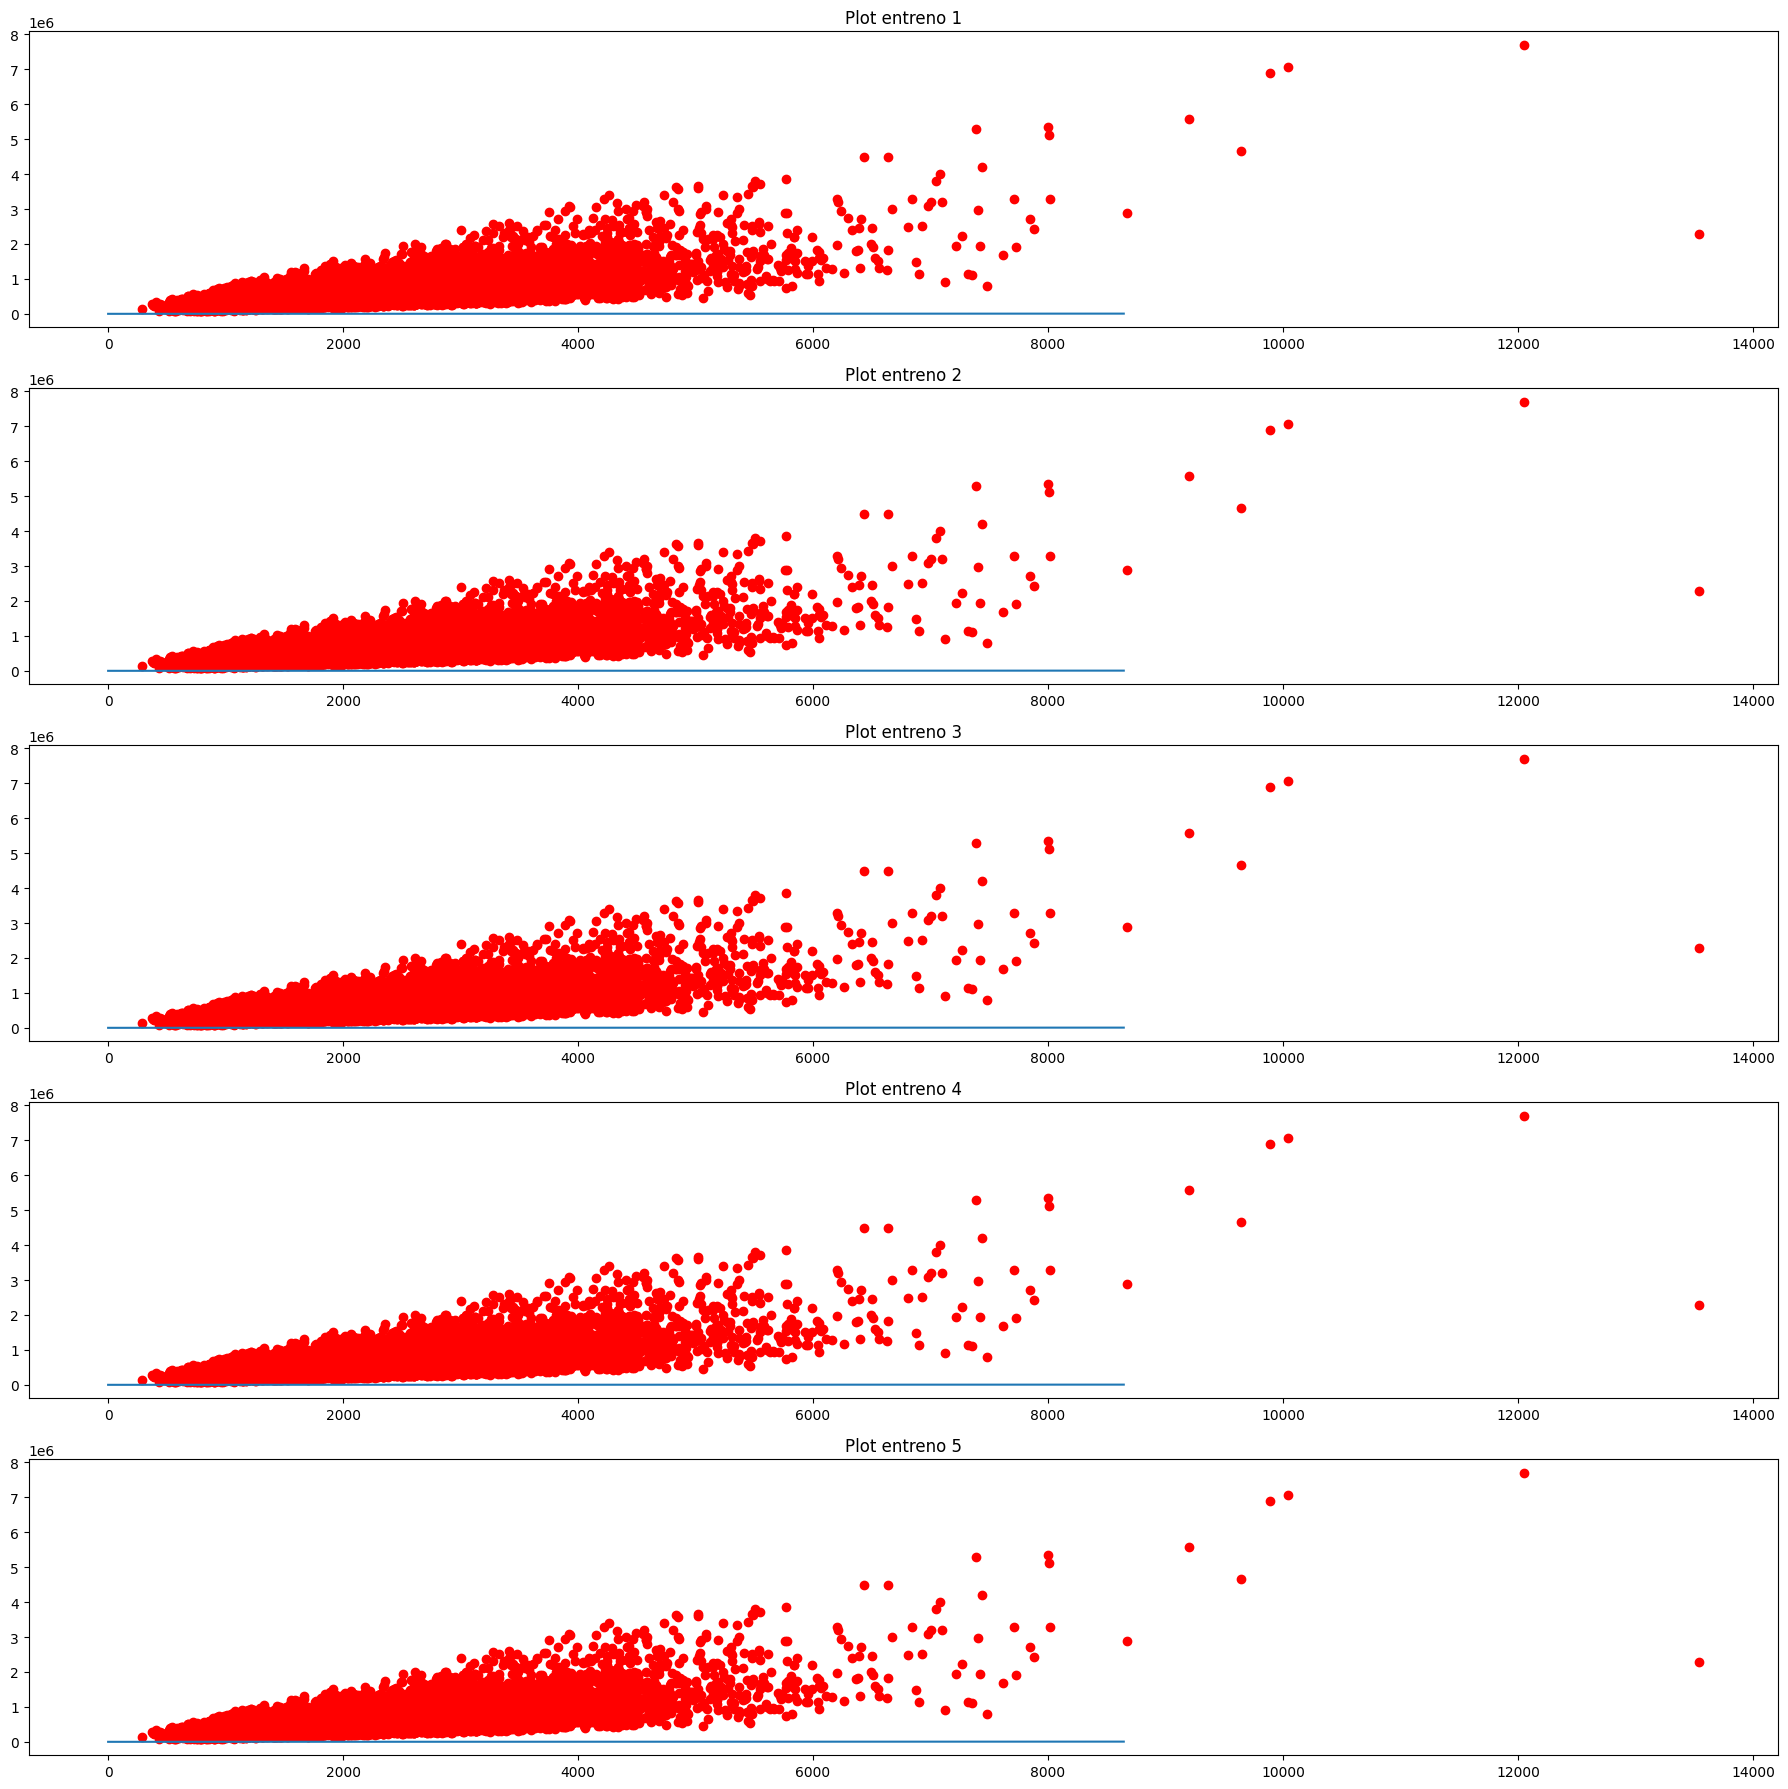

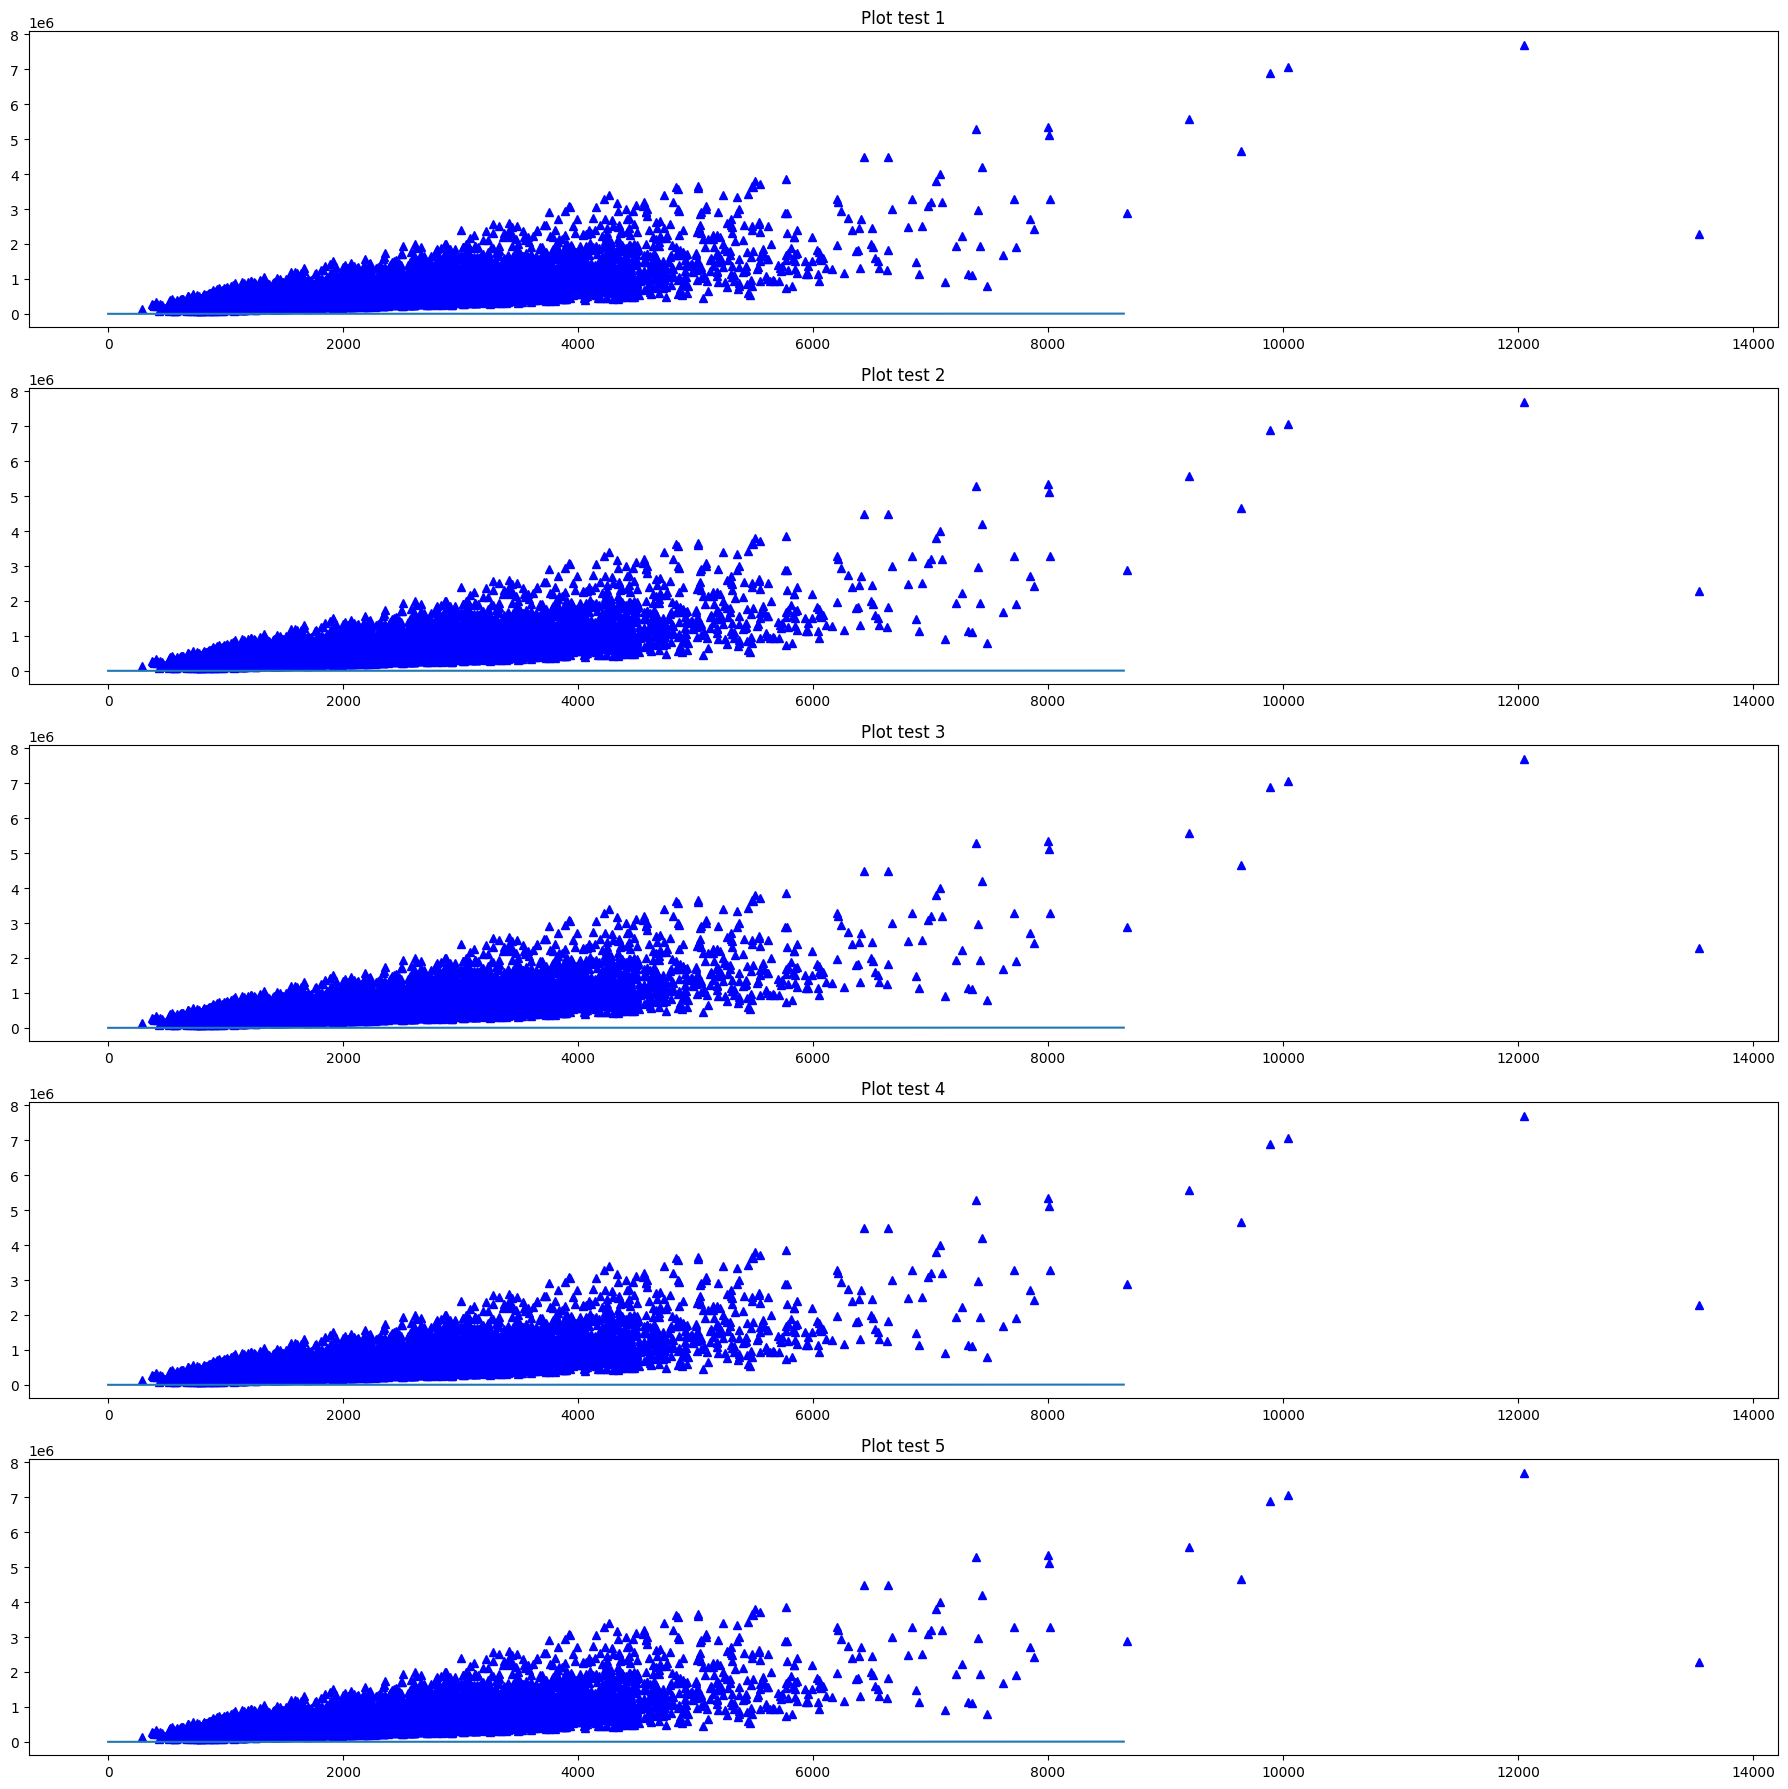

In [961]:
# Plot for entrenamiento data
fig1, axs1 = plt.subplots(nrows=5, ncols=1, figsize=(18, 18))

for i, ym1 in enumerate(arrayYM_entreno):
    ax = axs1[i]
    ax.plot(X, Y, 'ro') #puntos
    ax.plot(xm_entreno, ym1) #regresion
    ax.set_title(f'Plot entreno {i+1}')

plt.tight_layout()
plt.show()

# Plot for test data
fig2, axs2 = plt.subplots(nrows=5, ncols=1, figsize=(18, 18))

for i, ym1 in enumerate(arrayYM_test):
    ax = axs2[i]
    ax.plot(X, Y, 'b^') # blue triangles for test data
    ax.plot(xm_entreno, ym1) #regresion
    ax.set_title(f'Plot test {i+1}')

plt.tight_layout()
plt.show()


ahora vamos a ver los costos

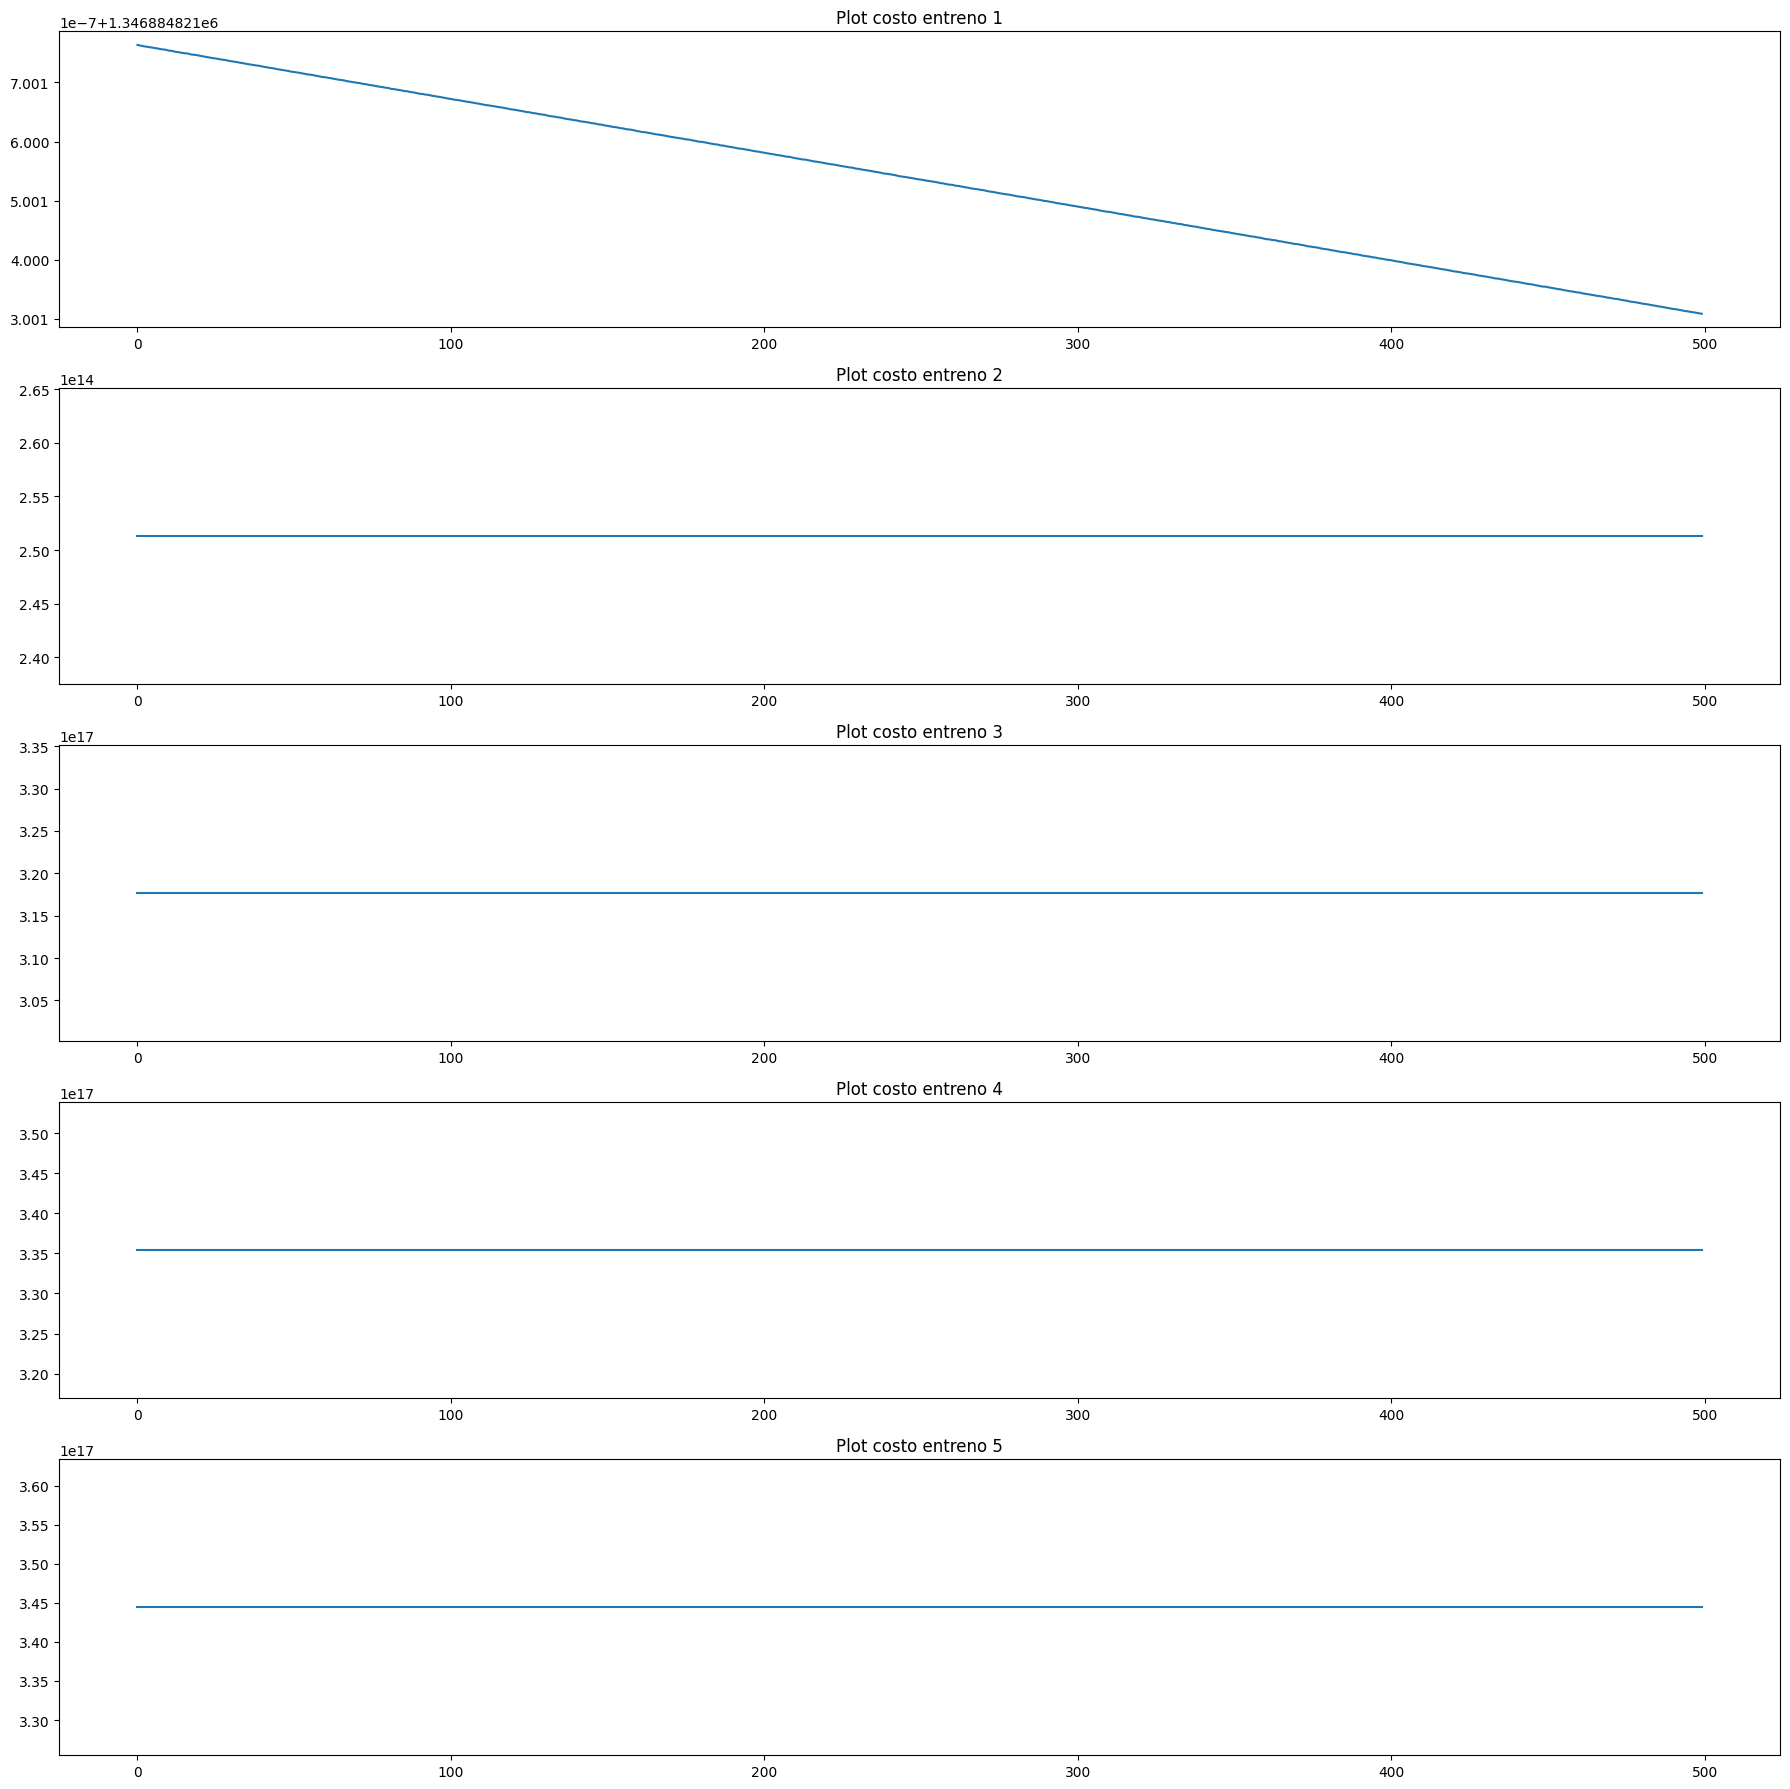

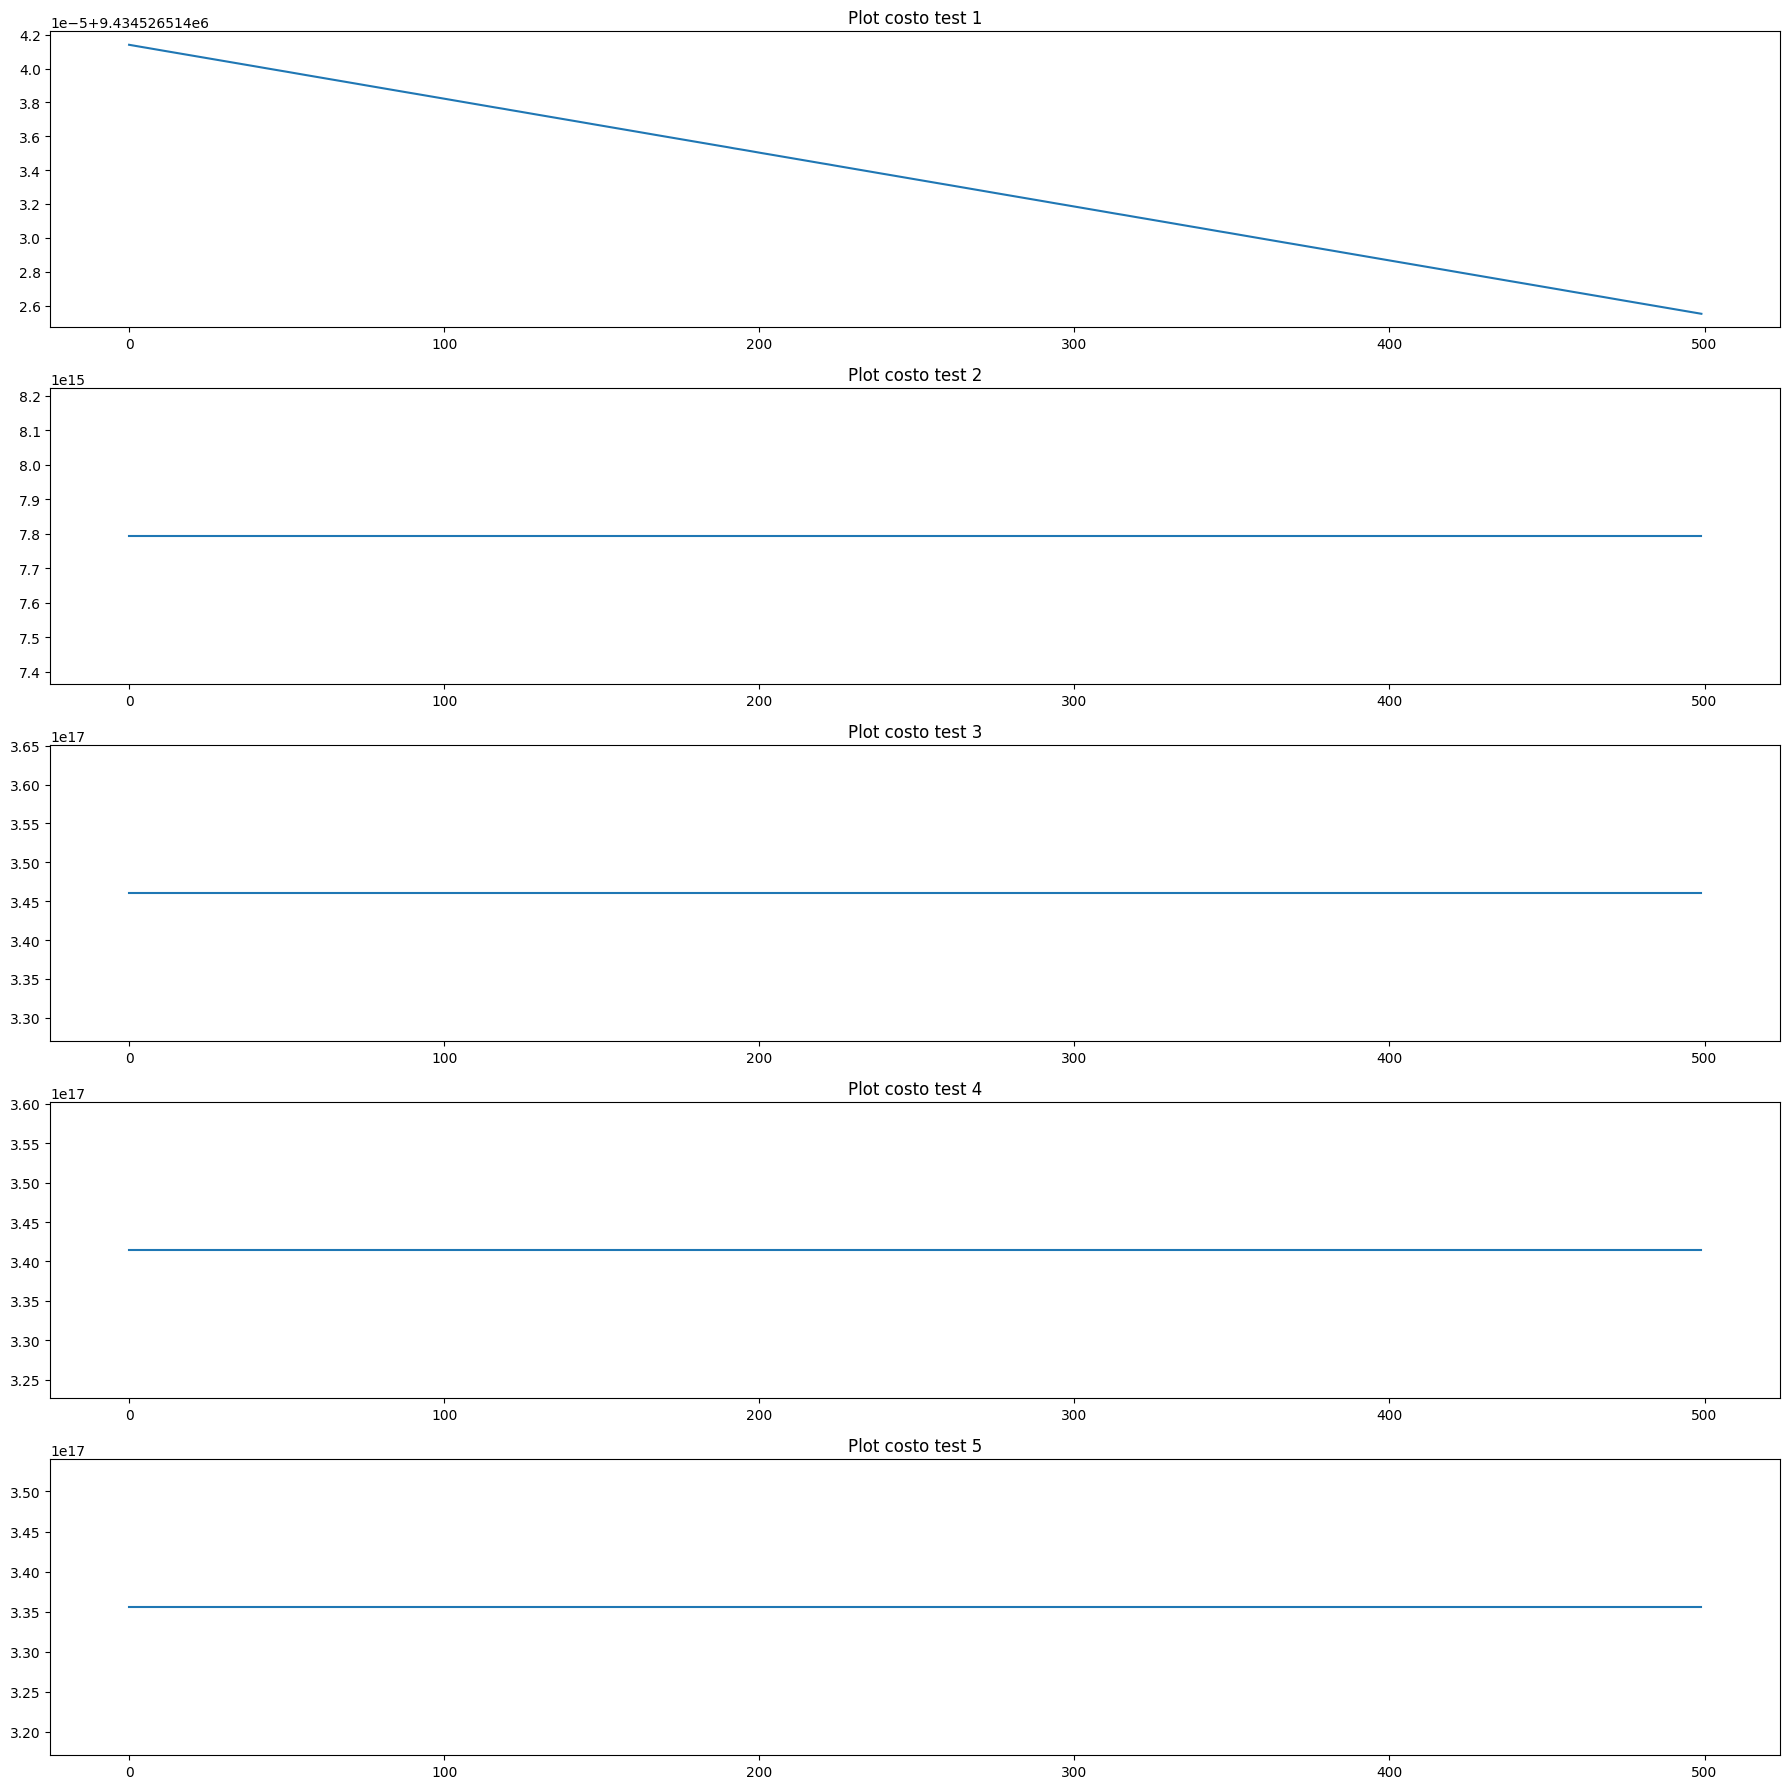

In [962]:
fig1, axs1 = plt.subplots(nrows=5, ncols=1, figsize=(18, 18))

for i, costo1 in enumerate(arrayCosts_entreno):
    ax = axs1[i]
    ax.plot(costo1) #costo
    ax.set_title(f'Plot costo entreno {i+1}')

plt.tight_layout()
plt.show()

fig2, axs2 = plt.subplots(nrows=5, ncols=1, figsize=(18, 18))

for i, costo2 in enumerate(arrayCosts_test):
    ax = axs2[i]
    ax.plot(costo2) #costo
    ax.set_title(f'Plot costo test {i+1}')

plt.tight_layout()
plt.show()


El mejor exponente es 3 pues aqui se normaliza el costo tanto en entreno como en test

### >> Task 1.5 

Dado que se tomo toda la información del dataset y luego se realizó una regresión lineal polinomica con descenso de gradiente, se obtuvieron resultados que permiten evaluar a este modelo no como el mejor para describir esta data pues podemos observar al graficar la regresión que el valor que obtenemos no representa muy bien los datos. 

El polinomio afecta directamente en el resultado que obtenemos y esto lo podemos ver en la task 1.2 y 1.3 que luego al utilizar polinomios con estos modelos en la task 1.4 tenemos resultados que no describen bien el dataset.

Se puede ver al observar los costos y los valores de theta que al tener un polinomio de 3er grado el costo se normaliza y la regresión tiene un valor constante.